<a href="https://colab.research.google.com/github/Benqui/Alcala-RE/blob/main/modelos-keras/pf_reconocimiento_facial_vgg16_300_epocas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link de la base de datos datosa https://drive.google.com/drive/folders/11kV3rkFNFevtIhE8Id1c5rcv1L5onkVz?usp=sharing 

In [1]:
!pip install brewer2mpl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl


def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

#def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='../content/drive/MyDrive/Escuela/ia/reconocer-jetas/fer2013/fer2013.csv'):
def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='../content/drive/MyDrive/reconocer-jetas/fer2013/fer2013.csv'):
   
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

In [8]:
## All three datasets are well loaded accordingly
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

X_test, y_test = load_data(sample_split=1.0,classes=emo,
usage='PrivateTest')

X_train, y_train = load_data(sample_split=1.0,classes=emo,
usage= 'Training')

X_val,y_val = load_data(sample_split=1.0,classes=emo,
usage= 'PublicTest')

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [9]:
## The shape of loaded data is under examination
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


In [10]:
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [11]:
# def expand_greyscale_image_channels(grey_pil_image):
#     grey_image_arr = np.array(grey_image)
#     grey_image_arr = np.expand_dims(grey_image_arr, -1)
#     grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
#     return grey_image_arr_3_channel

In [12]:
# # def expand_greyscale_image_channels(grey_pil_image):
# def expand_greyscale_image_channels(grey_image_arr):
#   r_array=np.array([])
#   for x in grey_image_arr:
#     x = np.expand_dims(x, -1)
#     x = x.repeat(3, axis=-1)
#     r_array= np.append(x)
#   # grey_image_arr = np.array(grey_pil_image)

#   print(r_array.shape)
#   return r_array


In [13]:
def expand_greyscale_image_channels(grey_image_arr):
    r_array = np.stack([np.repeat(x[:, :, np.newaxis], 3, axis=2) for x in grey_image_arr])
    return r_array

In [14]:
X_train = expand_greyscale_image_channels(X_train)
# y_train = expand_greyscale_image_channels(y_train)
X_test = expand_greyscale_image_channels(X_test)
# y_test = expand_greyscale_image_channels(y_test)
X_val = expand_greyscale_image_channels(X_val)
# y_val = expand_greyscale_image_channels(y_val)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 3, 1)
(28709, 6)
(3589, 48, 48, 3, 1)
(3589, 6)
(3589, 48, 48, 3, 1)
(3589, 6)


In [16]:
def save_data(X_test, y_test, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (zip(labels, counts))

Private test set


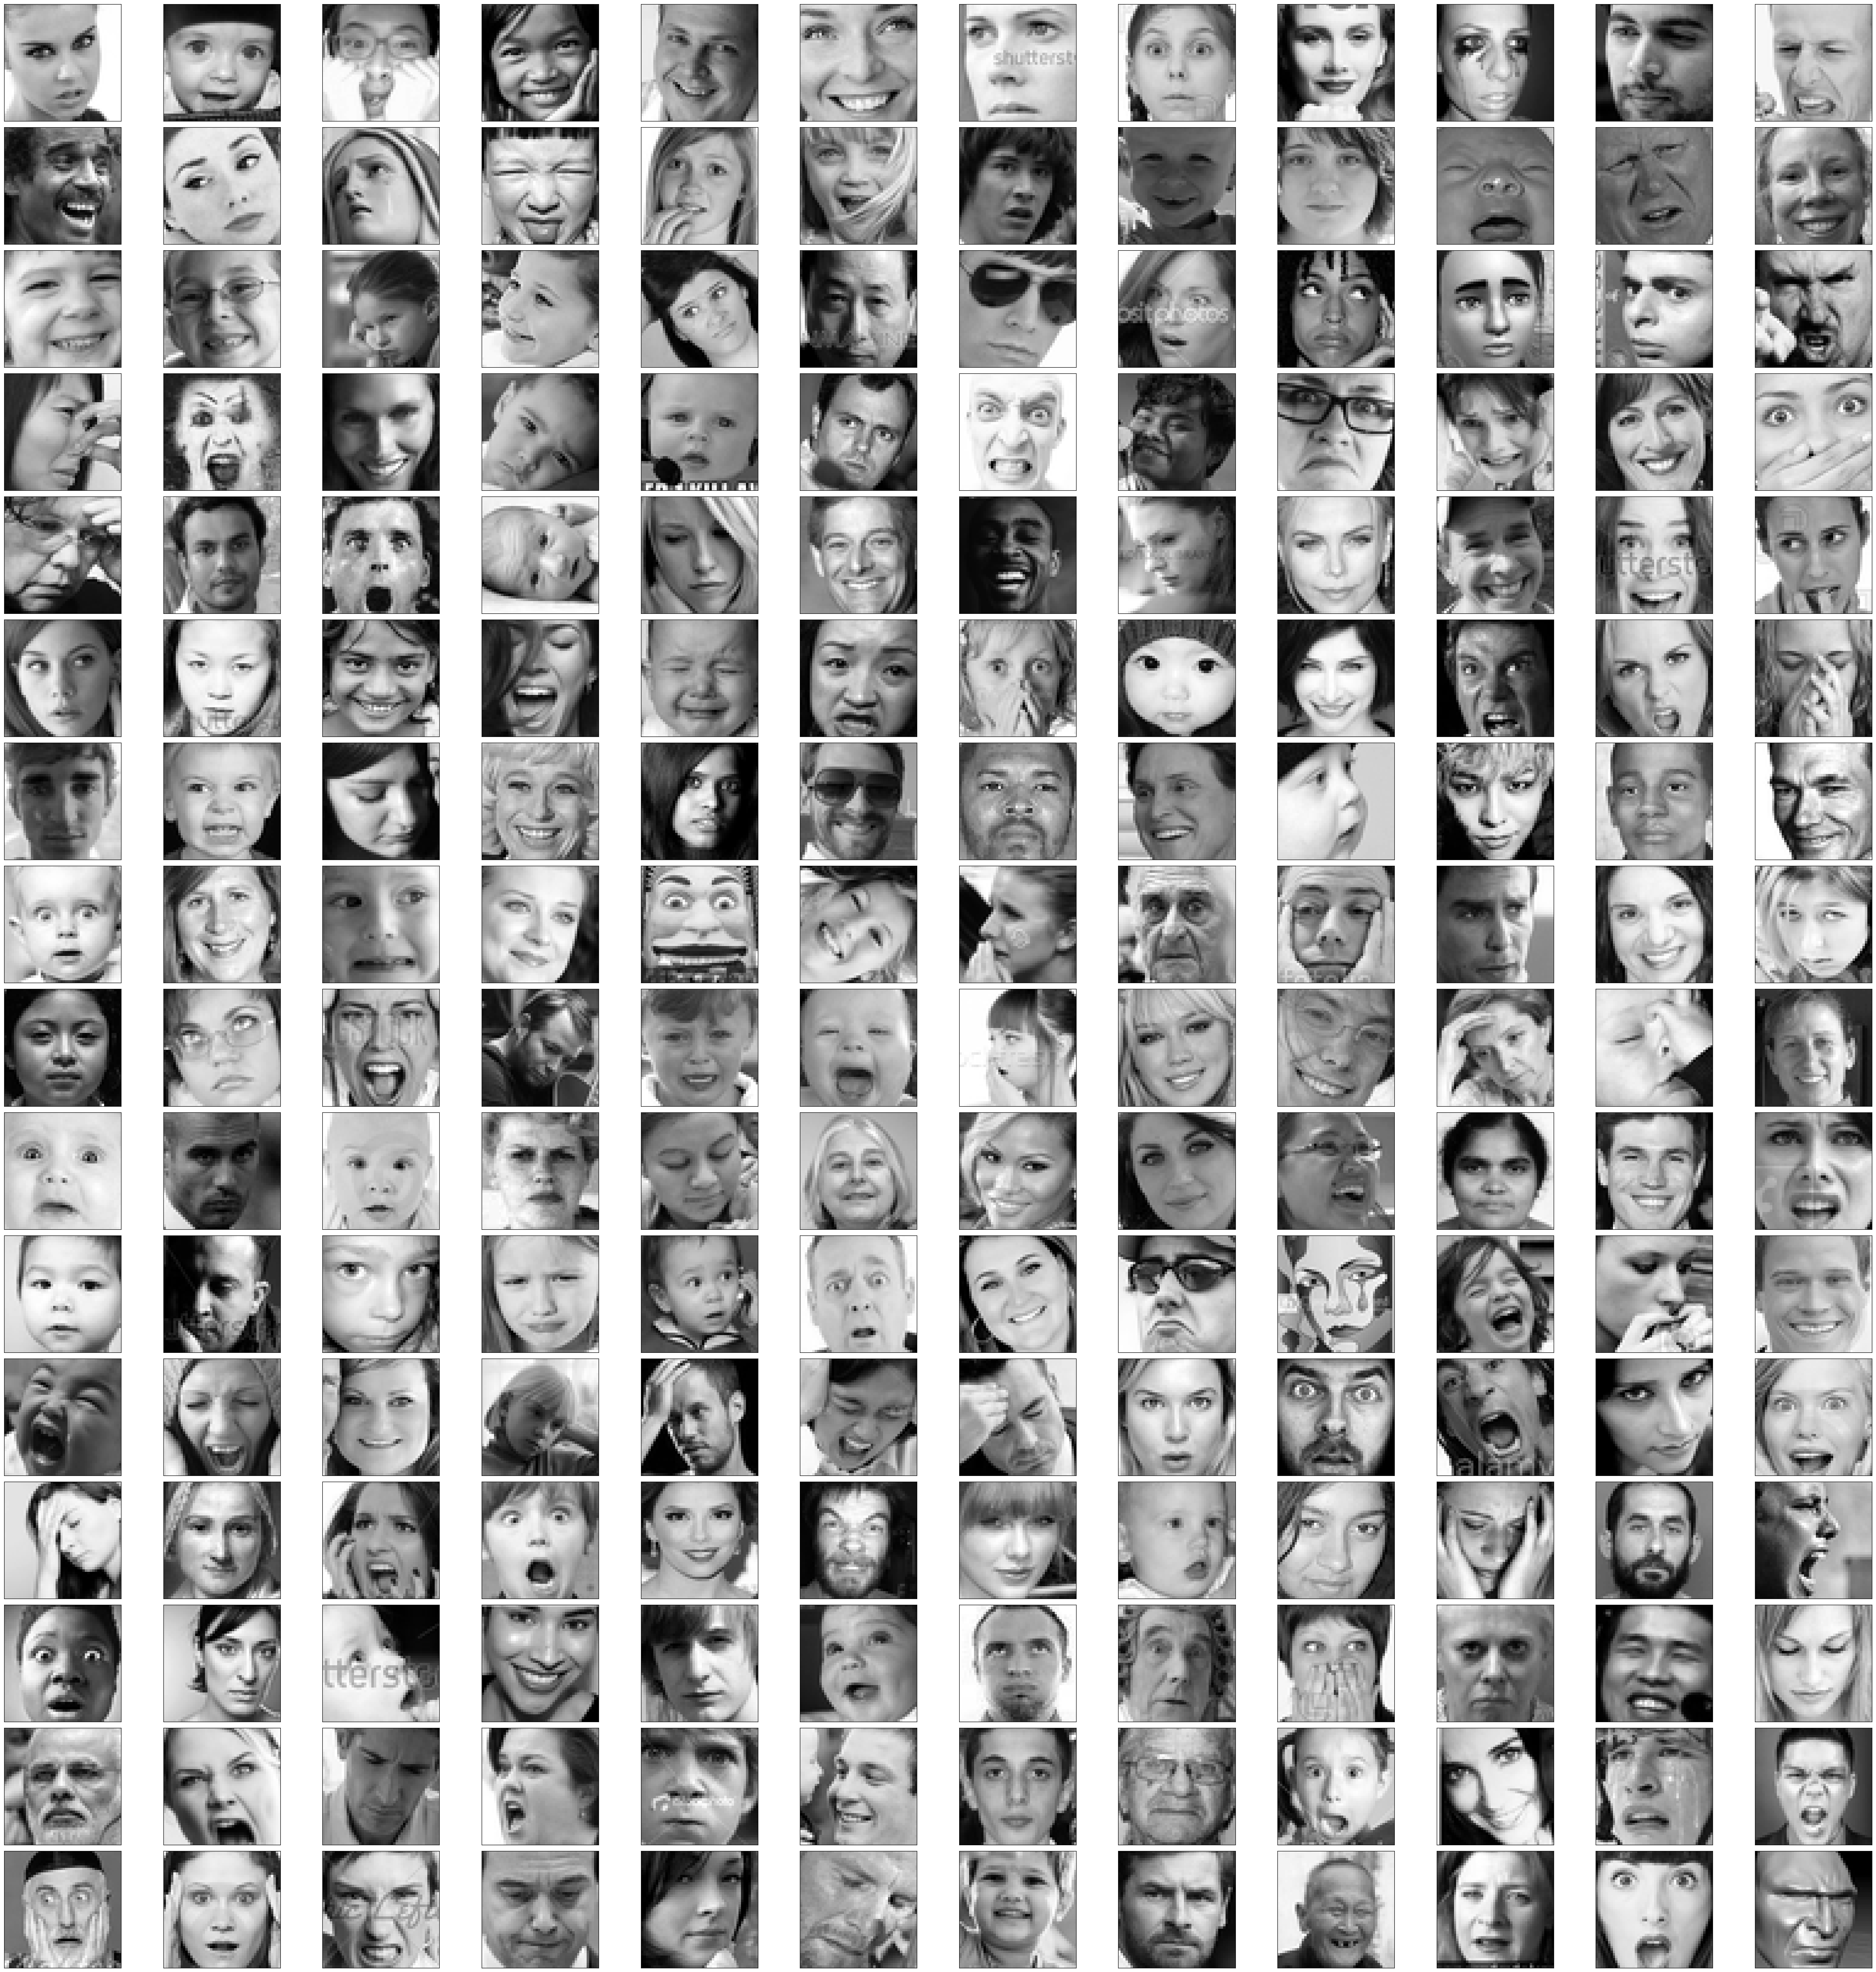

In [17]:
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(48,48))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

(1, 48, 48, 3, 1)


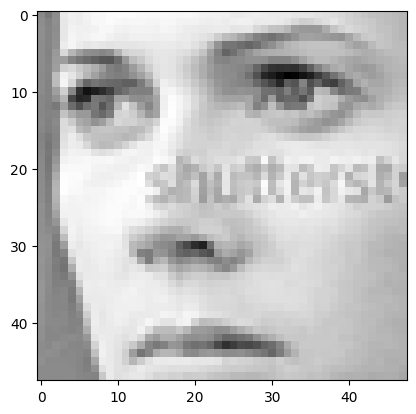

In [18]:
## Similarly we canvisualize any input with self-defined index with following code
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [19]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

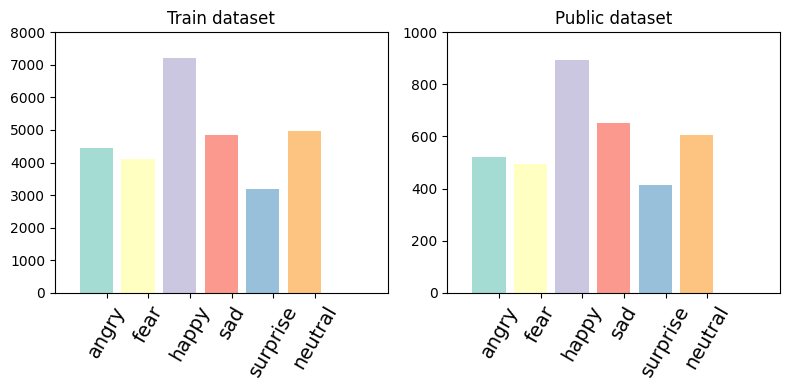

In [20]:
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    """
    The function is used to plot the distribution of the labels of provided dataset 
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train dataset', 'Public dataset'], \
                  ylims =[8000,1000])

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 3, 1)
(28709, 6)
(3589, 48, 48, 3, 1)
(3589, 6)
(3589, 48, 48, 3, 1)
(3589, 6)


In [22]:
# Final Model Architecture:
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation


In [23]:
from tensorflow.keras.applications import MobileNet, VGG16, ResNet50, VGG19
import tensorflow as tf
# pre_trained_model = base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")
pre_trained_model = base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")
# pre_trained_model = base_model = tf.keras.applications.VGG19(input_shape=(48,48,3),include_top=False,weights="imagenet")
#pre_trained_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights=None)

58889256/58889256 [==============================] - 4s 0us/step


In [24]:
pre_trained_model.trainable = False

In [25]:
pre_trained_model.output

pre_trained_model.input

<KerasTensor: shape=(None, 48, 48, 3) dtype=float32 (created by layer 'input_1')>

In [26]:
# for layer in base_model.layers[:-4]:
#     layer.trainable=False

In [27]:
# Building Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Activation


modelo=Sequential()
modelo.add(pre_trained_model)
# modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(BatchNormalization())
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
# modelo.add(Activation('relu'))
# modelo.add(Dropout(0.5))
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
# modelo.add(Activation('relu'))
# modelo.add(Dropout(0.5))
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dense(6,activation='softmax'))



In [28]:
#Agregar nuevas capas utlizando la API funcional de KERAS 
# from tensorflow.keras.models import Model


# x = Flatten()(pre_trained_model.output)
# x = Dense(64, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
# #x = Dense(128, activation='relu')(x)
# #x = Dense(16, activation='sigmoid')(x)
# x = Dense(32, activation='relu')(x)
# predicciones = Dense(6, activation='softmax')(x)

In [29]:
from tensorflow.keras.models import Model

# modelo = Model(inputs=pre_trained_model.input)
modelo.summary()
# pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 14,719,814
Trainable params: 4,102
Non-trainable params: 14,715,712
________________________________________

In [30]:
# modelo = pre_trained_model
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
#fit
nb_epoch = 300
batch_size = 128

# modelF = modelN.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size,
#           validation_data=(X_val, y_val), shuffle=True, verbose=1)
# history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,validation_data=(X_val, y_val), shuffle=True, verbose=1)
history = modelo.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,validation_data=(X_val, y_val))


Epoch 1/300
225/225 [==============================] - 19s 42ms/step - loss: 1.7244 - accuracy: 0.3113 - val_loss: 1.5946 - val_accuracy: 0.3592
Epoch 2/300
225/225 [==============================] - 8s 37ms/step - loss: 1.5660 - accuracy: 0.3800 - val_loss: 1.5438 - val_accuracy: 0.3973
Epoch 3/300
225/225 [==============================] - 8s 37ms/step - loss: 1.5222 - accuracy: 0.3980 - val_loss: 1.5339 - val_accuracy: 0.4029
Epoch 4/300
225/225 [==============================] - 8s 37ms/step - loss: 1.5002 - accuracy: 0.4090 - val_loss: 1.5312 - val_accuracy: 0.4043
Epoch 5/300
225/225 [==============================] - 9s 38ms/step - loss: 1.4878 - accuracy: 0.4154 - val_loss: 1.5228 - val_accuracy: 0.4129
Epoch 6/300
225/225 [==============================] - 9s 38ms/step - loss: 1.4765 - accuracy: 0.4188 - val_loss: 1.5241 - val_accuracy: 0.4093
Epoch 7/300
225/225 [==============================] - 9s 38ms/step - loss: 1.4708 - accuracy: 0.4249 - val_loss: 1.5153 - val_accuracy

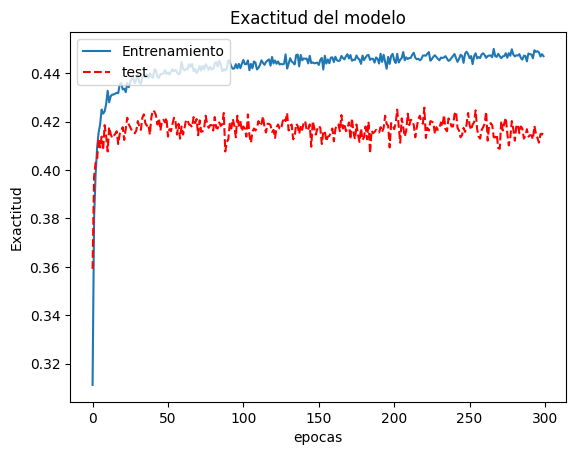

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

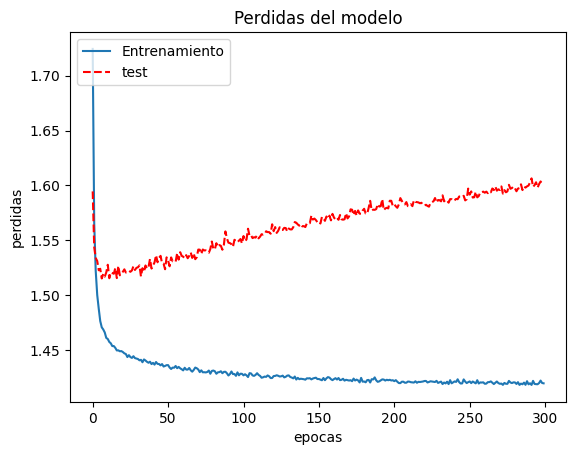

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [34]:
# model.save('facial_1')
from tensorflow.keras.models import load_model

# Assuming you have a trained model object called 'model'
modelo.save('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/mi_modelo_mkar6-300.h5')
# acc = modelF.history['acc']
# val_acc = modelF.history['val_acc']
# loss = modelF.history['loss']
# val_loss = modelF.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()



In [35]:
# evaluate model on private test set
score = modelo.evaluate(X, y, verbose=0)
print ("model %s: %.2f%%" % (modelo.metrics_names[1], score[1]*100))

model accuracy: 40.82%


In [36]:
# prediction and true labels
y_prob = modelo.predict(X, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [37]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    """
    The function is used to plot the picture subjects
    """
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [38]:
import brewer2mpl
def plot_probs(start,end, y_prob):
    """
    The function is used to plot the probability in histogram for six labels 
    """
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
        ax.bar(np.arange(0,6), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()



In [39]:
def plot_subjects_with_probs(start, end, y_prob):
    """
    This plotting function is used to plot the probability together with its picture
    """
    iter = int((end - start)/6)
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

In [40]:
# plot_subjects_with_probs(0, 36, y_prob)

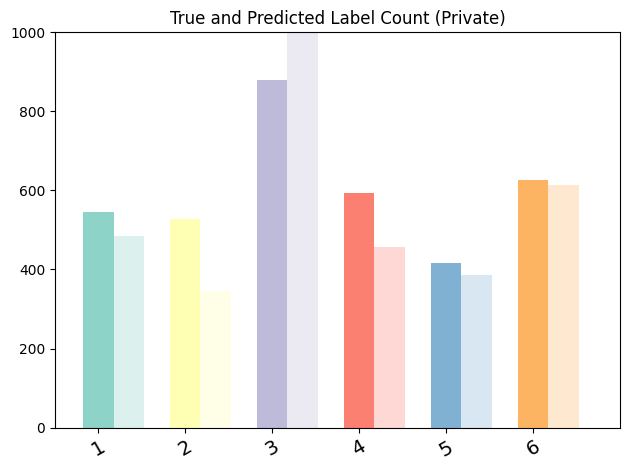

In [41]:
# def plot_distribution2(y_true, y_pred):
#     """
#     The function is used to compare the number of true labels as well as prediction results
#     """
#     colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
#     ind = np.arange(1.5,7,1)  # the x locations for the groups
#     width = 0.35   
#     fig, ax = plt.subplots()
#     true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
#     pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
#     ax.set_xticks(np.arange(1.5,7,1))
#     ax.set_xticklabels(labels, rotation=30, fontsize=14)
#     ax.set_xlim([1.25, 7.5])
#     ax.set_ylim([0, 1000])
#     ax.set_title('True and Predicted Label Count (Private)')
#     plt.tight_layout()
#     plt.show()

def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    labels = np.arange(1, 7)  # Labels for x-axis
    width = 0.35
    fig, ax = plt.subplots()

    # Calculate the counts for true and predicted labels
    true_counts = np.bincount(y_true, minlength=6)
    pred_counts = np.bincount(y_pred, minlength=6)

    true = ax.bar(labels, true_counts, width, color=colorset, alpha=1.0)
    pred = ax.bar(labels + width, pred_counts, width, color=colorset, alpha=0.3)

    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([0.5, 7])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()

    
plot_distribution2(y_true, y_pred)
